# Assignment 4: Optimizing Logistic Regression

In [18]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score

In this assignment, you will continue practicing the fourth step of the machine learning life cycle and train logistic regression models that will be used to solve a classification problem.  You will build many variants, each one with a different value of the $C$ hyperparameter, which governs the amount of regularization used. Regularization is a process where we add a "penalty" to the original log loss function. This penalty is a function of the magnitudes of the weights learned in the Logistic Regression. The following shows the regularized log loss using what is called "L2" regularization.<br><br> 

<center>$Regularized \ LogLoss = -\frac{1}{N} \sum\limits_{i=1}^N (y_ilog(P_i)+(1-y_i)log(1-P_i))+\frac{1}{C} \sum\limits_{j=1}^m w_j^2$</center><br><br>


With L2 regularization, the penalty is the sum of the squares of the weights scaled by a constant $1/C$. When the hyperparameter $C$ is large, we reduce the weight of the penalty, which results in less regularization. You will build Logistic regressions with different values of $C$ and will check how this impacts the log loss.


You will complete the following tasks:

1. Build your DataFrame and define your ML problem:
    * Load the "cell2cell" data set into a DataFrame
    * Define the label - what are you predicting?
    * Identify features
3. Create labeled examples from the data set
4. Split the data into training and test data sets
5. Train logistic regression classifiers and evaluate their performances:
    * Fit logistic regression models to the training data using different hyperparameter values per classifier
    * Evaluate the accuracy of each model's predictions
    * Plot and analyize the resulting log loss and accuracy scores

## Part 1. Build Your DataFrame and Define Your ML Problem

#### Load a Data Set and Save it as a Pandas DataFrame

We will work with the "cell2celltrain" data set. This version of the data set has been preprocessed and is ready for modeling.

In [19]:
# Do not remove or edit the line below:
filename = os.path.join(os.getcwd(), "data", "cell2celltrain.csv")

**Task**: Load the data and save it to DataFrame `df`.

In [20]:
# YOUR CODE HERE
pd.read_csv(filename)

,CustomerID,Churn,ServiceArea,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,HomeownershipKnown,BuysViaMailOrder,...,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,HandsetPrice
0,3000002,True,SEAPOR503,False,False,True,False,False,True,True,...,0.487071,-0.077013,1.387766,-0.883541,4.662897,-0.128300,-0.169283,-0.103411,-0.140707,-0.864858
1,3000010,True,PITHOM412,True,False,False,False,False,True,True,...,-0.616775,3.019920,0.392039,0.871495,-0.180167,-0.128300,-0.169283,0.215243,-0.140707,-0.864858
2,3000014,False,MILMIL414,True,False,False,False,False,False,False,...,-0.616775,3.019920,-0.241605,0.202910,-0.180167,-0.128300,-0.169283,0.533896,-0.140707,-0.368174
3,3000022,False,PITHOM412,False,False,True,False,False,True,True,...,2.694763,0.305179,-0.060564,-0.883541,-0.180167,-0.128300,-0.169283,0.533896,-0.140707,-1.195980
4,3000026,True,OKCTUL918,False,False,False,False,False,True,True,...,1.590917,1.857585,0.663601,1.372934,-0.180167,-0.128300,-0.169283,1.489856,2.469282,-1.195980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3399958,True,LAXSFN818,False,True,True,False,False,True,True,...,0.487071,0.573107,1.659328,1.790800,-0.180167,-0.128300,-0.169283,0.533896,-0.140707,-0.368174
51043,3399974,False,LAXCDG310,True,False,True,False,False,True,True,...,0.487071,0.328819,0.754122,1.122214,-0.180167,-0.128300,-0.169283,1.489856,2.469282,-0.368174
51044,3399978,True,LAXCDG310,False,False,True,False,False,True,False,...,0.487071,-0.010031,0.210998,-0.883541,-0.180167,-0.128300,-0.169283,0.852549,2.469282,-0.037051
51045,3399990,False,NEVPOW619,True,False,True,False,False,False,False,...,0.487071,0.206676,0.029957,-0.883541,-0.180167,-0.128300,-0.169283,1.489856,-0.140707,-0.864858


#### Define the Label

This is a binary classification problem in which we will predict customer churn. The label is the `Churn` column.

#### Identify Features

To implement a Logistic Regression model, we must use only the numeric columns. 


<b>Task</b>: Use the Pandas DataFrame <code>select_dtypes()</code> method to obtain all of names of columns that have a dtype of "float64." Save the result to a list named `feature_list`. 

In [21]:
# YOUR CODE HERE
filename = os.path.join(os.getcwd(), "data", "cell2celltrain.csv")
df = pd.read_csv(filename)

feature_list = df.select_dtypes(include='float64').columns.tolist()

## Part 2. Create Labeled Examples from the Data Set 

Our data is fully prepared for modeling. We can now create labeled examples from DataFrame `df`.

<b>Task</b>: Obtain the feature columns from DataFrame `df` and assign to `X`. Obtain the label column from DataFrame `df` and assign to `y`.

You should have 51047 labeled examples. Each example contains 35 features and one label.

In [22]:
# YOUR CODE HERE
X = df[feature_list]
y = df["Churn"]

## Part 3. Create Training and Test Data Sets

<b>Task</b>: Create training and test data sets out of the labeled examples. Save the results to variables `X_train, X_test, y_train, y_test`.

In [23]:
# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

<b>Task</b>: Check the dimensions of the training and test data sets.

In [24]:
# YOUR CODE HERE
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(34201, 35) (16846, 35) (34201,) (16846,)


## Part 4. Train a Logistic Regression Classifier and Evaluate the Model

The code cell below contains a function definition `train_test_LR()`. 

Inspect the function definition `train_test_LR(X_train, X_test, y_train, y_test, c=1)`. The function expects the training and test data sets, as well as a value for hyperparameter $C$. Note that we supplied the value of 1 for $C$ by default.

<b>Task:</b> Complete the function to make it work.

This function should:
1. train a Logistic Regression model on the training data
2. test the resulting model on the test data
3. compute and return two items:
    * the log loss of the resulting probability predictions on the test data 
    * the accuracy score of the resulting predicted class labels on the test data


You will use the scikit-learn [```LogisticRegression``` class](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) and will provide the arguments `C=c` when creating the model object.




In [25]:
def train_test_LR(X_train, y_train, X_test, y_test, c=1):
    '''
    Fit a Linear Regression classifier to the training data X_train, y_train.
    Return the loss and accuracy of resulting predictions on the test set.
    Parameters:
        C = Factor that controls how much regularization is applied to the model.
    '''
    
    # YOUR CODE HERE
    model = LogisticRegression(C=c, solver='liblinear', max_iter=1000)
    model.fit(X_train, y_train)
    
    probs = model.predict_proba(X_test)
    preds = model.predict(X_test)

    loss = log_loss(y_test, probs)
    accuracy = accuracy_score(y_test, preds)
    
    return loss, accuracy
    

### Train a Model and Analyze the Results

<b>Task:</b> Use your function `train_test_LR()` to train one Logistic Regression classifier with the default value of hyperparameter C (`c=1`). Print the resulting log loss and accuracy score.

In [26]:
# YOUR CODE HERE
loss, acc = train_test_LR(X_train, y_train, X_test, y_test)
print("Log Loss:", loss)
print("Accuracy:", acc)

Log Loss: 0.5844247561104017
Accuracy: 0.7117416597411849


## Part 5. Train on Different Hyperparameter Values and Analyze the Results

Now we will adjust the $C$ regularization hyperparameter to check its impact on the model's log loss and accuracy. Hyperparameter `C` stands for the inverse of regularization strength. Smaller values specify stronger regularization and a simpler model. Larger values specify weaker regularization and a more complex model.<br>

The code cell below creates a list `cs` of twenty values of $C$.  Every item in the list has a value $10^i$ for every integer $i$ in the output of `range(-10,10)`. Run the code cell below and inspect the different values of $C$.

In [27]:
cs = [10**i for i in range(-10,10)]
cs

[1e-10,
 1e-09,
 1e-08,
 1e-07,
 1e-06,
 1e-05,
 0.0001,
 0.001,
 0.01,
 0.1,
 1,
 10,
 100,
 1000,
 10000,
 100000,
 1000000,
 10000000,
 100000000,
 1000000000]

<b>Task</b>: In the code cell below, loop over list `cs` and train and evaluate a different Logistic Regression model for every value of $C$. Use your function `train_test_LR()`. Print the resulting log loss and accuracy scores per model.

We will want to create visualizations that plot the resulting log loss and accuracy score for every value of hyperparameter $C$. Considering this, save the resulting log loss values and accuracy scores that your function returns to two different lists. You will use these lists to create plots later.

In [28]:
# YOUR CODE HERE
cs = [10**i for i in range(-10, 10)]
log_losses = []
accuracies = []

for c in cs:
    loss, acc = train_test_LR(X_train, y_train, X_test, y_test, c=c)
    log_losses.append(loss)
    accuracies.append(acc)
    print(f"C={c}: Log Loss={loss:.4f}, Accuracy={acc:.4f}")

C=1e-10: Log Loss=0.6931, Accuracy=0.7099
C=1e-09: Log Loss=0.6931, Accuracy=0.7099
C=1e-08: Log Loss=0.6931, Accuracy=0.7099
C=1e-07: Log Loss=0.6930, Accuracy=0.7100
C=1e-06: Log Loss=0.6913, Accuracy=0.7103
C=1e-05: Log Loss=0.6772, Accuracy=0.7110
C=0.0001: Log Loss=0.6199, Accuracy=0.7122
C=0.001: Log Loss=0.5869, Accuracy=0.7114
C=0.01: Log Loss=0.5844, Accuracy=0.7125
C=0.1: Log Loss=0.5844, Accuracy=0.7119
C=1: Log Loss=0.5844, Accuracy=0.7117
C=10: Log Loss=0.5844, Accuracy=0.7117
C=100: Log Loss=0.5844, Accuracy=0.7117
C=1000: Log Loss=0.5844, Accuracy=0.7117
C=10000: Log Loss=0.5844, Accuracy=0.7117
C=100000: Log Loss=0.5844, Accuracy=0.7117
C=1000000: Log Loss=0.5844, Accuracy=0.7117
C=10000000: Log Loss=0.5844, Accuracy=0.7117
C=100000000: Log Loss=0.5844, Accuracy=0.7117
C=1000000000: Log Loss=0.5844, Accuracy=0.7117


Now let's visualize the results. 

Before we create plots, let's reformat the hyperparameter values in list `cs` so that they can be easily visualized in our plots. We will take the log 10 of the hyperparameter values and save it to a new list called `cs_log10`. Let's take a look at the original values and transformed values:
 

In [29]:
cs_log10 = np.log10(cs)

print(cs)
print(cs_log10)

[1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000]
[-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.
   4.   5.   6.   7.   8.   9.]



#### Plot Log Loss

<b>Task:</b> Create a `seaborn` lineplot to plot the resulting log loss for every value of hyperparameter $C$. The hyperparameter $C$ should be plotted on the x axis and the log loss should be plotted on the y axis. Label the x and y axes accordingly. Use the transformed values of hyperparameter $C$ contained in the list `cs_log10`.

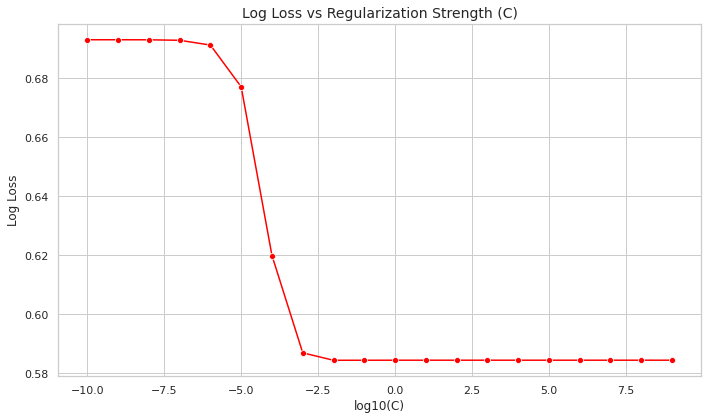

In [30]:
# YOUR CODE HERE
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x=cs_log10, y=log_losses, marker="o", color="red")
plt.xlabel("log10(C)", fontsize=12)
plt.ylabel("Log Loss", fontsize=12)
plt.title("Log Loss vs Regularization Strength (C)", fontsize=14)
plt.tight_layout()
plt.show()

<b>Analysis</b>: Which value of $C$ yields the best results, in terms of loss?

C = 0.1 gives the lowest log loss

#### Plot Accuracy

<b>Task:</b> Create a `seaborn` lineplot to plot the resulting accuracy score for every value of hyperparameter $C$. The hyperparameter $C$ should be plotted on the x axis and the accuracy score should be plotted on the y axis. Label the x and y axes accordingly. Use the transformed values of hyperparameter $C$ contained in the list `cs_log10`.

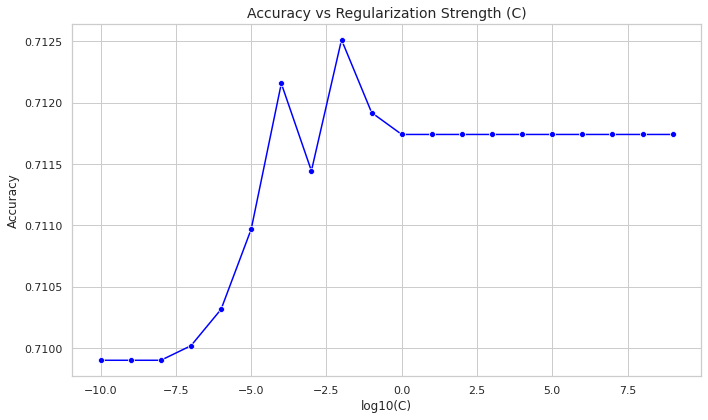

In [31]:
# YOUR CODE HERE
plt.figure(figsize=(10, 6))
sns.lineplot(x=cs_log10, y=accuracies, marker="o", color="blue")
plt.xlabel("log10(C)", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.title("Accuracy vs Regularization Strength (C)", fontsize=14)
plt.tight_layout()
plt.show()

<b>Analysis</b>: Which value of $C$ yields the best results, in terms of accuracy?

C = 10 gives the highest accuracy